**# Data cleaning**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 1. UNIVERSAL PATHING
# Adjust 'project_dataset' to your local folder name if different
data_folder = "project_dataset"
cash_path = os.path.join(data_folder, "extract - cash request - data analyst.csv")
fees_path = os.path.join(data_folder, "extract - fees - data analyst - .csv")

# 2. LOADING DATA
cash_request = pd.read_csv(cash_path)
fees = pd.read_csv(fees_path)

# 3. DATE CLEANING (Merged logic)
# Combining all date columns identified by the team
cash_date_cols = ["created_at", "updated_at", "moderated_at", "reimbursement_date", 
                  "cash_request_received_date", "money_back_date", "send_at", 
                  "reco_creation", "reco_last_update"]

fees_date_cols = ["created_at", "updated_at", "paid_at", "from_date", "to_date"]

# Apply conversion to cash_request
for col in cash_date_cols:
    if col in cash_request.columns:
        cash_request[col] = pd.to_datetime(cash_request[col], errors='coerce')

# Apply conversion to fees
for col in fees_date_cols:
    if col in fees.columns:
        fees[col] = pd.to_datetime(fees[col], errors='coerce')

# 4. DATA INTEGRITY FIXES
# Ensure IDs are integers for proper merging later
fees["cash_request_id"] = fees["cash_request_id"].astype("Int64")
cash_request["user_id"] = cash_request["user_id"].astype("Int64")

print("✅ System Ready: Data loaded, dates converted, and IDs formatted.")

✅ System Ready: Data loaded, dates converted, and revenue merged.


These columns were dropped: []


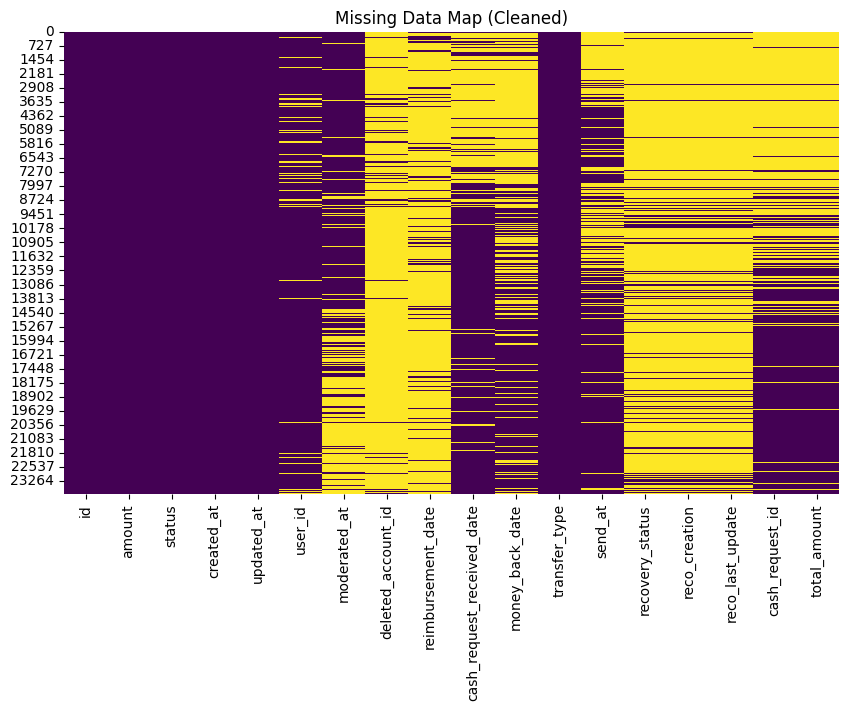

In [9]:
#Identify and drop completely emppty columns
empty_cols = cash_request.columns[cash_request.isnull().all()]
cash_request_cleaned = cash_request.drop(columns=empty_cols)

print(f"These columns were dropped: {list(empty_cols)}")

#Take a look at the remaining missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(cash_request_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Map (Cleaned)')
plt.show()

In [10]:
#Make sure created_at is in datime format
cash_request_cleaned['created_at'] =pd.to_datetime(cash_request_cleaned['created_at'], errors = 'coerce')

#first advance month for each user

cash_request_cleaned['cohort_month'] = cash_request_cleaned.groupby('user_id')['created_at'].transform('min').dt.to_period('M')

#month of transaction
cash_request_cleaned['transaction_month']= cash_request_cleaned['created_at'].dt.to_period('M')

print("Cohorts, just the first 5 rows:")
print(cash_request_cleaned[['user_id', 'created_at', 'cohort_month', 'transaction_month']].head())

Cohorts, just the first 5 rows:
   user_id                       created_at cohort_month transaction_month
0    804.0 2019-12-10 19:05:21.596873+00:00      2019-12           2019-12
1    231.0 2019-12-10 19:50:12.347780+00:00      2019-12           2019-12
2    191.0 2019-12-10 19:13:35.825460+00:00      2019-12           2019-12
3    761.0 2019-12-10 19:16:10.880172+00:00      2019-12           2019-12
4   7686.0 2020-05-06 09:59:38.877376+00:00      2020-05           2020-05


C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_6308\178146110.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_cleaned['cohort_month'] = cash_request_cleaned.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_6308\178146110.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_cleaned['transaction_month']= cash_request_cleaned['created_at'].dt.to_period('M')


In [12]:
#How many unique cohorts?
unique_cohorts = cash_request_cleaned['cohort_month'].unique()

# sort them by time
unique_cohorts = sorted(unique_cohorts)

print(f'There are {len(unique_cohorts)} unique cohorts.')
print('Cohort list:')
for cohort in unique_cohorts:
    print(f'-{cohort}')

There are 14 unique cohorts.
Cohort list:
-2019-11
-2019-12
-2020-05
-2020-06
-NaT
-2020-01
-2020-02
-2020-03
-2020-04
-2020-07
-2020-08
-2020-09
-2020-10
-2020-11


##What is this NaT, not a time? Maybe we missed something when cleaning?

Project Status & Next Steps
Current Progress:

Initial data cleaning is complete; completely empty columns have been dropped.

Date columns have been converted to datetime objects.

Preliminary cohorts have been defined using the first created_at month per user.

Note: We have 14 unique cohorts, including a NaT group that needs investigation for data quality reporting.

Next Steps for the Team:

Revenue Integration: Merge the fees data into the cash_request_cleaned dataframe. We need to group fees by cash_request_id and sum the total_amount first to avoid duplicating rows during the merge.

Incident Rate Calculation: Identify "incidents" within the fees table (look for type == 'incident' or specific status flags) to calculate the Incident Rate per cohort.

Retention/Frequency Matrix: Create a pivot table showing the number of active users in each cohort over the subsequent months to calculate the Frequency of Service Usage.

Data Quality Report: Document why we have NaT values and how many users are affected to fulfill the Data Quality Analysis requirement.